In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

def polar_to_cartesian(rho, theta):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    
    return x, y 

# Calculate distance of point from line
def point_line_distance(x, y, x1, y1, x2, y2):
    absolute_dist = np.abs((y2 - y1) * x - (x2 - x1) * y + x2 * y1 - y2 * x1)
    normalization = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

    return absolute_dist / normalization

# Split-and-Merge algorithm
def split_and_merge(points, start, end, threshold):
    # Break case
    if start >= end:
        return []
    
    x1, y1 = points[start]
    x2, y2 = points[end]
    max_dist = 0
    farthest_index = start

    # Loop through points and find farthest points
    for i in range(start + 1, end):
        x, y = points[i]
        dist = point_line_distance(x, y, x1, y1, x2, y2)
        if dist > max_dist:
            max_dist = dist
            farthest_index = i

    # Recurse down
    if max_dist > threshold:
        # Split step
        half1 = split_and_merge(points, start, farthest_index, threshold)
        half2 = split_and_merge(points, farthest_index, end, threshold)

        # Merge step
        return half1 + half2
    else:
        # Leaf Smallest Entry
        return [(start, end)]


In [5]:
# Test data
rhos = np.array([[10, 11, 11.7, 13, 14, 15, 16, 17, 17, 17, 16.5, 17, 17, 16, 14.5, 14, 13]]).T
n = rhos.shape[0]
thetas = (math.pi / 180) * np.linspace(0, 85, n).reshape(-1, 1)

# Convert to Cartesian coordinates
xs, ys = polar_to_cartesian(rhos, thetas)
points = list(zip(xs.flatten(), ys.flatten()))

# Apply Split-and-Merge algorithm
line_segments = split_and_merge(points, 0, len(points) - 1, threshold=0.5)

print(line_segments)

[(0, 4), (4, 7), (7, 12), (12, 16)]


[(0, 4), (4, 7), (7, 12), (12, 16)]


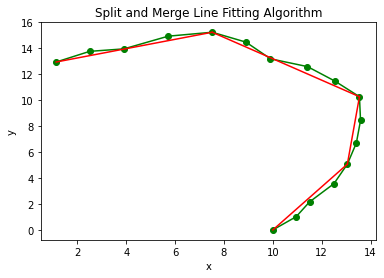

In [6]:
# Plotting the results
plt.figure()
plt.plot(xs, ys, 'go-')  # Original data points

for start, end in line_segments:
    x1, y1 = points[start]
    x2, y2 = points[end]
    plt.plot([x1, x2], [y1, y2], 'r')

print(line_segments)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Split and Merge Line Fitting Algorithm')
plt.show()
